# Physics 494/594
## Linear Regression Example

In [1]:
# %load ./include/header.py
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('./include')
import ml4s
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('./include/notebook.mplstyle')
np.set_printoptions(linewidth=120)
ml4s._set_css_style('./include/bootstrap.css')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Last Time

### [Notebook Link: 04_Linear_Regression.ipynb](./04_Linear_Regression.ipynb)

- Cost functions and formulating a machine learning task as an optimization problem
- Understand linear regression 

## Today

- Find the maximal likelihood estimates for multivariate regression


<div class="span alert alert-success">
<h2> Team Programming challenge: Multivariate Regression </h2>

The linearized Navier-Stokes equations for the density of a continuous fluid as a function of pressure and temperature is given by:
    
\begin{equation}
\frac{\rho}{\rho_0} = \beta_T p - \alpha_P T 
\end{equation}

where $\rho_0$ is the density of the steady-state background flow, $\beta_T$ is the isothermal compressibility and $\alpha_P$ is the isobaric coefficient of thermal expansion. For the data in the file `../data/ns_equation_of_state.dat` find the maximum likelihood values of $\beta_T$ and $\alpha_P$.
    
    
<h3>Step 1:</h3>
    Inspect the data (via <code>!head</code>) and load from disk using <code>np.loadtxt</code>.
</div>

In [2]:
!head ../data/ns_equation_of_state.dat

# # Experimental Data for Hg in the liquid phase
#              	           atm	             K
#            ρ̄	             P	             T
-3.87333990e-02	8.00000000e-01	2.35000000e+02
-3.95099949e-02	8.08163265e-01	2.35000000e+02
-3.88344280e-02	8.16326531e-01	2.35000000e+02
-3.89784455e-02	8.24489796e-01	2.35000000e+02
-4.01670739e-02	8.32653061e-01	2.35000000e+02
-4.05541281e-02	8.40816327e-01	2.35000000e+02
-3.78353260e-02	8.48979592e-01	2.35000000e+02


In [3]:
file_name = "../data/ns_equation_of_state.dat"
ρ̄,p,T = np.loadtxt(file_name, unpack=True)

<div class="span alert alert-success">
    <h3> Step 2: </h3>
Plot the data;  you will need to use <code>np.reshape</code> in order to use <code>plt.pcolormesh</code>.  The matrix size should be $50\times50$
    </div>

In [6]:
T.shape

(2500,)

In [4]:
grid_size = 50
T_2D = T.reshape(grid_size,grid_size)
p_2D = p.reshape(grid_size,grid_size)
ρ̄_2D = ρ̄.reshape(grid_size,grid_size)

/lustre/haven/proj/UTK0154/local/envs/ml4s/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """Entry point for launching an IPython kernel.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


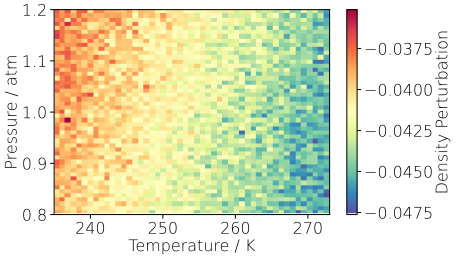

In [5]:
plt.pcolormesh(T_2D,p_2D,ρ̄_2D, cmap='Spectral_r', rasterized=True)
plt.colorbar(label='Density Perturbation')
plt.ylabel('Pressure / atm')
plt.xlabel('Temperature / K');

<div class="span alert alert-success">
    <h3>Step 2: </h3>
Form the input and target arrays, making sure to add the extra dimension to incorporate a possible bias.
    <br /><br />
    
   **Note:** Here $T$ is the temperature (an input dimension) while our target is $\bar{\rho}$.
</div>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


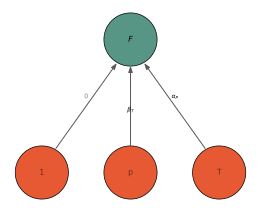

In [7]:
N = [2+1,1]
labels = [['1','p','T'],[r'$F$']]
ml4s.draw_network(N,node_labels=labels, weights=[['0',r'$\beta_T$',r'$\alpha_P$']], biases=[' '])

In [10]:
print(p)

[0.8        0.80816327 0.81632653 ... 1.18367347 1.19183673 1.2       ]


In [16]:
X = np.zeros([len(p),3])
X[:,0] = 1
X[:,1] = p
X[:,2] = T

In [17]:
#W_opt = np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(),X)),X.transpose()),T)
#C_opt = 0.5*np.average((np.dot(X,W_opt)-T)**2)

W_opt = np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(),X)),X.transpose()),ρ̄)
C_opt = 0.5*np.average((np.dot(X,W_opt)-ρ̄)**2)

print(f'W_opt = {W_opt}')
print(f'C_opt = {C_opt}')

W_opt = [-0.00083501  0.00374924 -0.00017673]
C_opt = 4.05401591277796e-07


<div class="span alert alert-success">
    <h3>Step 3: </h3>
Compare the multi-variable regression result with the data.  You should start by computing the optimal value.
</div>

In [20]:
np.min(C)

NameError: name 'C' is not defined

In [19]:
ρ̄_opt = np.polyfit(X,ρ̄,1)

TypeError: expected 1D vector for x

<div class="span alert alert-success">
You shouldn't have to touch any of the following code if you defined everything consistently.
</div>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d')

points = ax.scatter(T_2D, p_2D, ρ̄_2D, marker='o', color='grey', s=3)

surf = ax.plot_surface(T_2D, p_2D, ρ̄_opt , rstride=1, cstride=1, cmap='Spectral_r', 
                       linewidth=0, antialiased=True, rasterized=True)

ax.set_xlabel('Temperature  / K',labelpad=8)
ax.set_ylabel('Pressure  / atm',labelpad=8)
ax.set_zlabel(r'$\rho/\rho_0$',labelpad=12);